# Part 1: Generate Simulation Data and Run Inference

## Step 1: Generate data

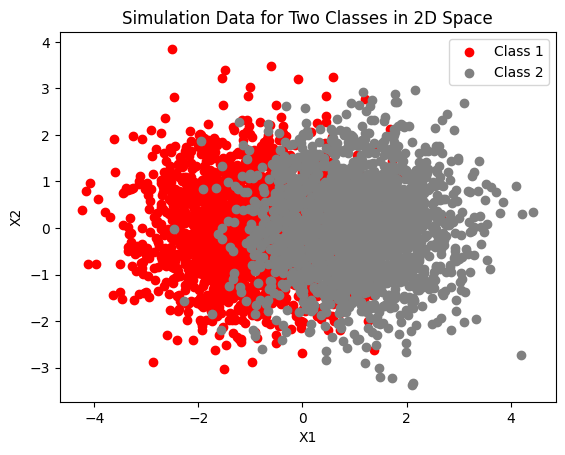

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of records for each class
num_records = 2000

# Centers of the Gaussian distributions
center1 = [-1, 0]
center2 = [1, 0]

# Unit variance
variance = 1

# Generate data for the first class
class1_data = np.random.normal(loc=center1, scale=variance, size=(num_records, 2))

# Generate data for the second class
class2_data = np.random.normal(loc=center2, scale=variance, size=(num_records, 2))


# Create labels
class1_labels = np.zeros(num_records)
class2_labels = np.ones(num_records)

# Combine the data and labels
data = np.vstack((class1_data, class2_data))
labels = np.hstack((class1_labels, class2_labels))

distances = np.linalg.norm(data - center1, axis=1)

# Plot the data to visualize
plt.scatter(class1_data[:, 0], class1_data[:, 1], c='red', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='gray', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Simulation Data for Two Classes in 2D Space')
plt.show()

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader

# Convert to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Custom dataset class
class GaussianDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

# Create the dataset
dataset = GaussianDataset(data, labels)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

# Example usage
for batch_data, batch_labels in dataloader:
    print(batch_data, batch_labels)
    break

tensor([[-1.4506, -1.4871],
        [-1.4056,  0.0793],
        [-2.3828, -1.0247],
        [-2.1992, -0.3032],
        [-2.1818, -1.0853],
        [-0.6386,  0.4421],
        [-1.0248,  0.0564],
        [ 0.5629,  1.9590],
        [-1.6361,  0.1904],
        [-0.4479, -2.1126],
        [ 0.0147, -0.8812],
        [-2.0157, -0.2220],
        [-1.7660, -0.3550],
        [-1.9952,  1.8548],
        [-0.8513,  0.8020],
        [ 0.5781, -0.5090],
        [-2.1657,  2.0894],
        [-0.8099,  0.1849],
        [-1.8309, -1.4454],
        [-2.0370,  1.3272],
        [-2.6299,  1.4452],
        [-0.8820,  0.7387],
        [-0.5462,  1.3399],
        [-0.3861,  1.1635],
        [-3.4539,  0.7596],
        [-0.3254, -0.9250],
        [-2.3076, -0.2865],
        [ 0.2090, -0.0330],
        [-0.8847,  0.0834],
        [-2.7927,  0.3162],
        [-0.1372, -0.9968],
        [ 0.4433,  0.6455]]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

## Step 2: Classify the above data

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # input layer
        self.fc2 = nn.Linear(16, 16)  # hidden layer
        self.fc3 = nn.Linear(16, 2)   # output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}')

# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

# Visualize decision boundary
def plot_decision_boundary(model, data, labels):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid)
        _, Z = torch.max(Z, 1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=20, edgecolor='k')
    plt.show()

# plot_decision_boundary(model, data.numpy(), labels.numpy())

Epoch 1/10, Loss: 0.6548229029178619
Epoch 2/10, Loss: 0.4834734888076782
Epoch 3/10, Loss: 0.41300239992141724
Epoch 4/10, Loss: 0.3931636770963669
Epoch 5/10, Loss: 0.39017916601896285
Epoch 6/10, Loss: 0.3878925347328186
Epoch 7/10, Loss: 0.3862358092069626
Epoch 8/10, Loss: 0.38489958679676056
Epoch 9/10, Loss: 0.38363151979446414
Epoch 10/10, Loss: 0.38267636066675187
Accuracy: 83.50%


In [4]:
# Evaluate the model
model.eval()
softmax = nn.Softmax(dim=1)
with torch.no_grad():
    with open("simulation_phase1.txt", "w") as f:
        correct = 0
        total = 0
        for inputs, labels in dataloader:
            outputs = model(inputs)
            probabilities = softmax(outputs)
            _, predicted = torch.max(outputs.data, 1)
    
            for i in range(inputs.size(0)):
                    data_str = inputs[i].numpy()
                    label_str = labels[i].item()
                    model_score = probabilities[i].numpy()
                    predicted_value = predicted[i].item()
                    f.write(f"{data_str}, {label_str}, {model_score}, {predicted_value}\n")
            

## Step 3: Generate regression target

In [5]:
# Compute distances to the center [-1, 0]
distances = distances + np.random.normal(0, 0.1, size=distances.shape)  # Gaussian noise with mean 0 and std deviation 0.1
distances = torch.tensor(distances, dtype=torch.float32)

# Custom dataset class for the distance labeled data
class DistanceDataset(Dataset):
    def __init__(self, data, distances):
        self.data = data
        self.distances = distances

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        distance = self.distances[idx]
        return sample, distance

# Create the dataset
distance_dataset = DistanceDataset(data, distances)
class1_index = list(range(0, int(len(distance_dataset)/2), 1))
class1_distance_dataset = torch.utils.data.Subset(distance_dataset, class1_index) 

# Create a DataLoader
distance_dataloader = DataLoader(distance_dataset, batch_size=32, shuffle=False)
class1_distance_dataloader = DataLoader(class1_distance_dataset, batch_size=32, shuffle=False)

# Example usage
for batch_data, batch_distances in class1_distance_dataloader:
    print(batch_data, batch_distances)
    break

tensor([[-1.4506, -1.4871],
        [-1.4056,  0.0793],
        [-2.3828, -1.0247],
        [-2.1992, -0.3032],
        [-2.1818, -1.0853],
        [-0.6386,  0.4421],
        [-1.0248,  0.0564],
        [ 0.5629,  1.9590],
        [-1.6361,  0.1904],
        [-0.4479, -2.1126],
        [ 0.0147, -0.8812],
        [-2.0157, -0.2220],
        [-1.7660, -0.3550],
        [-1.9952,  1.8548],
        [-0.8513,  0.8020],
        [ 0.5781, -0.5090],
        [-2.1657,  2.0894],
        [-0.8099,  0.1849],
        [-1.8309, -1.4454],
        [-2.0370,  1.3272],
        [-2.6299,  1.4452],
        [-0.8820,  0.7387],
        [-0.5462,  1.3399],
        [-0.3861,  1.1635],
        [-3.4539,  0.7596],
        [-0.3254, -0.9250],
        [-2.3076, -0.2865],
        [ 0.2090, -0.0330],
        [-0.8847,  0.0834],
        [-2.7927,  0.3162],
        [-0.1372, -0.9968],
        [ 0.4433,  0.6455]]) tensor([1.6800, 0.4808, 1.7161, 1.1583, 1.5459, 0.6396, 0.0536, 2.5547, 0.6467,
        2.2870, 1.4730,

## Step 4: Predict the distance

In [6]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(class1_distance_dataloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(distance_dataloader)}')



Epoch 1/20, Loss: 0.3063434065580368
Epoch 2/20, Loss: 0.04382275335490703
Epoch 3/20, Loss: 0.020628005146980287
Epoch 4/20, Loss: 0.01276464969664812
Epoch 5/20, Loss: 0.008929336562752724
Epoch 6/20, Loss: 0.006966136295348406
Epoch 7/20, Loss: 0.006091990239918232
Epoch 8/20, Loss: 0.00575650641322136
Epoch 9/20, Loss: 0.0056139171048998834
Epoch 10/20, Loss: 0.005544581923633814
Epoch 11/20, Loss: 0.005490627307444811
Epoch 12/20, Loss: 0.0054517252631485465
Epoch 13/20, Loss: 0.005422736760228872
Epoch 14/20, Loss: 0.005402357917279005
Epoch 15/20, Loss: 0.005387783791869879
Epoch 16/20, Loss: 0.005375569641590118
Epoch 17/20, Loss: 0.005369771499186754
Epoch 18/20, Loss: 0.00536099173873663
Epoch 19/20, Loss: 0.0053567011207342145
Epoch 20/20, Loss: 0.005348996065557003


## Step 5: Eval distance model

In [7]:
# Evaluate the model and write to file
model.eval()
with torch.no_grad():
    with open("simulation_phase2.txt", "w") as f:
        f.write("Data, True Distance, Predicted Distance\n")
        for inputs, true_distances in distance_dataloader:
            predicted_distances = model(inputs)
            for i in range(inputs.size(0)):
                data_str = inputs[i].numpy()
                true_distance = true_distances[i].item()
                predicted_distance = predicted_distances[i].item()
                f.write(f"{data_str}, {true_distance}, {predicted_distance}\n")

# Part 2: Conformal Control 

## Step 1: Read in simulation data

In [10]:
import pandas as pd
import numpy as np

# Read the TSV file into a pandas DataFrame
file_path = '/Volumes/Seagate/WorkPlace/Conformal/Ranking/Jupyter/simulation-data.tsv'
df = pd.read_csv(file_path, sep='\t')
# Convert all columns to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

# Convert each row into a dictionary
data_list = df.to_dict(orient='records')

(validation_data, test_data) = random_split(data_list, 0.7)


In [9]:
def  random_split(data_list, ratio=0.7):
    # Set random seed for reproducibility
    np.random.seed(41)
    
    # Shuffle the data
    np.random.shuffle(data_list)
    
    # Calculate the split index
    split_index = int(len(data_list) * 0.7)
    
    # Split the data into validation and test sets
    validation_data = data_list[:split_index]
    test_data = data_list[split_index:]
    return (validation_data, test_data)

## Stage 1 control

In [80]:
alpha = 0.2
def calc_lambda(val_data, alpha):
    pre_lambda_val = 0
    lambda_val = 0.5
    delta = abs(pre_lambda_val  - lambda_val) 
    precision = 0.00001
    M = len(val_data)
    # print(M)
    threshold = (M + 1) * alpha - 1
    # print(threshold)
    # iteration = 0
    while delta >= precision:
        # print(lambda_val)
        total_loss = 0 
        for record in val_data:
            total_loss += calc_l1_risk(record, lambda_val)[0]
        # print(total_loss)
        if total_loss > threshold:
            lambda_val -= delta / 2
        elif total_loss < threshold:
            lambda_val += delta / 2
        else:
            break
        pre_lambda_val = lambda_val
        delta /= 2
    return lambda_val

calc_lambda(validation_data, alpha)

0.05579376220703125

In [12]:
def calc_l1_risk(record, threshold):
    # print(record)
    score = record['score']
    label = record['label']
    # print(score)
    # print(label)
    prediction = 1 if score >= threshold else 0
    risk = 1 if (prediction != label and label == 1) else 0
    return (risk, prediction)

record = validation_data[0]
print(record)
print(calc_l1_risk(record, 0.5))

{'x': -0.70713544, 'y': 0.11658767, 'label': 1, 'score': 0.7079051, 'target': 0.1386791915, 'prediction': 0.2993896008}
(0, 1)


In [14]:
def verify_l1(val_data, lambda_val):
    err=0
    count = 0
    for record in val_data:
        count +=1
        if record['label'] == 1:
            if record['score'] < lambda_val:
                err += 1
    return (err+0.0)/(count+0.0)

## Stage 2 Control

In [15]:
beta = 0.2
def calc_gamma(val_data, beta):
    all_delta = list()
    for record in val_data:
        label = record['label']
        target = record['target']
        prediction = record['prediction']
        delta = abs(target - prediction)
        if label==1:
            all_delta.append(delta)
    all_delta.sort()
    quantile = (1-beta)*(1+ 1.0/len(all_delta))
    # print(quantile)
    quantile_index = int ( quantile * len(all_delta))
    gamma_val= all_delta[quantile_index]
    return gamma_val
    # print(all_delta)
calc_gamma(validation_data, beta)

0.15335404900000005

In [19]:
beta=0.2
def calc_gamma_v2(val_data, beta, lambda_val = 0.0): 
    pre_gamma_val = 0
    gamma_val = 0.5
    delta = abs(pre_gamma_val  - gamma_val) 
    precision = 0.00001
    M = len(val_data)
    # print(M)
    threshold = (M + 1) * beta - 1
    # print(threshold)
    # iteration = 0
    while delta >= precision:
        # print(lambda_val)
        total_loss = 0 
        for record in val_data:
            total_loss += calc_l2_risk(record, gamma_val, lambda_val)
        # print(total_loss)
        if total_loss > threshold:
            gamma_val += delta / 2
        elif total_loss < threshold:
            gamma_val -= delta / 2
        else:
            break
        pre_gamma_val = gamma_val
        delta /= 2
    return gamma_val
    
calc_gamma_v2(validation_data, beta)

0.10199737548828125

In [16]:
def calc_l2_risk(record, gamma_val, lambda_val = 0.0):
    # in this implementation, risk increases as gamma increases 
    # for monotonic decreasing, apply 1-gamma
    label=record['label']
    score = record['score']
    predicted_label = 1 if score > lambda_val else 0
    target = record['target']
    prediction = record['prediction']
    pred_low = prediction-gamma_val
    pred_high = prediction+gamma_val
    # print(pred_low)
    # print(pred_high)
    risk = 1 if label ==1 and (predicted_label == 0 or (target< pred_low or target > pred_high)) else 0
    return risk
print(validation_data[0])
calc_l2_risk(validation_data[0], 0.09917449951171875)

{'x': -0.70713544, 'y': 0.11658767, 'label': 1, 'score': 0.7079051, 'target': 0.1386791915, 'prediction': 0.2993896008}


1

In [17]:
def verify_l2(val_data, gamma_val, lambda_val):
    err=0
    count = 0
    for record in val_data:
        count +=1
        if record['label'] == 1:
            risk = calc_l2_risk(record, gamma_val, lambda_val)
            err += risk
    # print(count)
    # print(err)
    return (err+0.0)/(count+0.0)
verify_l2(test_data, 0.09917449951171875, 0.2)

0.42333333333333334

## Joint control 

what occassion will cause L2 not controlled?
l1 with a big alpha, but l2 with small beta

fix alpha, change beta
change alpha, fix beta

In [20]:
import numpy as np
alpha = 0.1 
num_reps = 100
ratio = 0.5
for beta in np.linspace(0.01, 0.2, 10):
    l1_risk_vals = np.zeros(num_reps)
    l2_risk_vals = np.zeros(num_reps)
    for rep in range(num_reps):
        (validation_data, test_data) = random_split(data_list, ratio)
        lambda_val = calc_lambda(validation_data, alpha)
        gamma_val = calc_gamma_v2(validation_data, beta, lambda_val)
        l1_risk_val = verify_l1(test_data, lambda_val)
        l2_risk_val = verify_l2(test_data, gamma_val, lambda_val)
        l1_risk_vals[rep] = l1_risk_val
        l2_risk_vals[rep] = l2_risk_val
    print('{},{},{}'.format(alpha, np.average(l1_risk_vals), np.average(l2_risk_vals)))
        
        

0.1,0.10133333333333332,0.10133333333333332
0.1,0.100725,0.100725
0.1,0.10179166666666667,0.10179166666666667
0.1,0.09739166666666668,0.09739166666666668
0.1,0.10111666666666666,0.10111666666666666
0.1,0.10012499999999998,0.11652500000000002
0.1,0.09893333333333335,0.13515833333333332
0.1,0.09938333333333331,0.15625833333333333
0.1,0.09935833333333333,0.179225
0.1,0.09954166666666668,0.20056666666666673


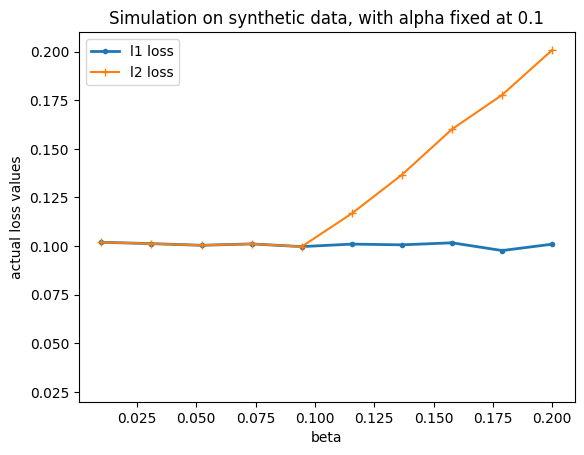

In [32]:
beta=[0.01,
0.0311111111111111,
0.0522222222222222,
0.0733333333333333,
0.0944444444444444,
0.115555555555555,
0.136666666666666,
0.157777777777777,
0.178888888888888,
0.2]
l1_risk_vals = [
    0.101966666666666,
0.101266666666666,
0.100416666666666,
0.101125,
0.0997333333333333,
0.101025,
0.10065,
0.101691666666666,
0.0977166666666666,
0.100991666666666,
]
l2_risk_vals = [0.101966666666666,
0.101266666666666,
0.100416666666666,
0.101125,
0.0997333333333333,
0.116783333333333,
0.136675,
0.160108333333333,
0.177716666666666,
0.200833333333333,]
plt.plot(beta, l1_risk_vals, label="l1 loss",marker='o', markersize=3,linewidth=2)
plt.plot(beta, l2_risk_vals, label="l2 loss",marker='+',linewidth=1.5)
plt.ylim((0.02,0.21))
plt.title("Simulation on synthetic data, with alpha fixed at 0.1")
plt.xlabel("beta")
plt.ylabel("actual loss values")
plt.legend(loc="upper left")
plt.savefig('synthetic_fixed_alpha.png')
plt.show()


In [125]:
import numpy as np
beta = 0.1
num_reps = 100
ratio = 0.5
for alpha in np.linspace(0.01, 0.2, 10):
    l1_risk_vals = np.zeros(num_reps)
    l2_risk_vals = np.zeros(num_reps)
    for rep in range(num_reps):
        (validation_data, test_data) = random_split(data_list, ratio)
        lambda_val = calc_lambda(validation_data, alpha)
        gamma_val = calc_gamma_v2(validation_data, beta, lambda_val)
        l1_risk_val = verify_l1(test_data, lambda_val)
        l2_risk_val = verify_l2(test_data, gamma_val, lambda_val)
        l1_risk_vals[rep] = l1_risk_val
        l2_risk_vals[rep] = l2_risk_val
    # print(risk_vals)
    print('{},{},{}'.format(alpha, np.average(l1_risk_vals), np.average(l2_risk_vals)))
        # print('{}:{}:{}'.format(beta, l2_risk_val, gamma_val))
        
        

0.01,0.010408333333333335,0.09950833333333332
0.03111111111111111,0.031558333333333334,0.10097499999999998
0.052222222222222225,0.051266666666666676,0.09990833333333331
0.07333333333333333,0.07155833333333333,0.098675
0.09444444444444444,0.09417500000000001,0.100475
0.11555555555555555,0.115725,0.115725
0.1366666666666667,0.13620833333333332,0.13620833333333332
0.1577777777777778,0.15940833333333332,0.15940833333333332
0.1788888888888889,0.18079166666666663,0.18079166666666663
0.2,0.20302499999999998,0.20302499999999998


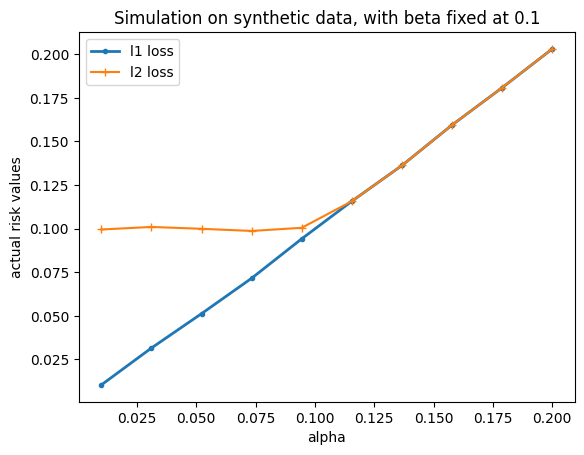

In [28]:
alpha=[0.01,
0.0311111111111111,
0.0522222222222222,
0.0733333333333333,
0.0944444444444444,
0.115555555555555,
0.136666666666666,
0.157777777777777,
0.178888888888888,
0.2]
l1_risk_vals =[
    0.0104083333333333,
0.0315583333333333,
0.0512666666666666,
0.0715583333333333,
0.094175,
0.115725,
0.136208333333333,
0.159408333333333,
0.180791666666666,
0.203024999999999,
]
l2_risk_vals = [0.0995083333333333,
0.100974999999999,
0.0999083333333333,
0.098675,
0.100475,
0.115725,
0.136208333333333,
0.159408333333333,
0.180791666666666,
0.203024999999999,]
plt.plot(alpha, l1_risk_vals, label="l1 loss",marker='o', markersize=3, linewidth=2)
plt.plot(beta, l2_risk_vals, label="l2 loss",marker='+',linewidth=1.5)

plt.title("Simulation on synthetic data, with beta fixed at 0.1")
plt.xlabel("alpha")
plt.ylabel("actual risk values")
plt.legend(loc="upper left")
plt.savefig('synthetic_fixed_beta.png')
plt.show()


# Plot data

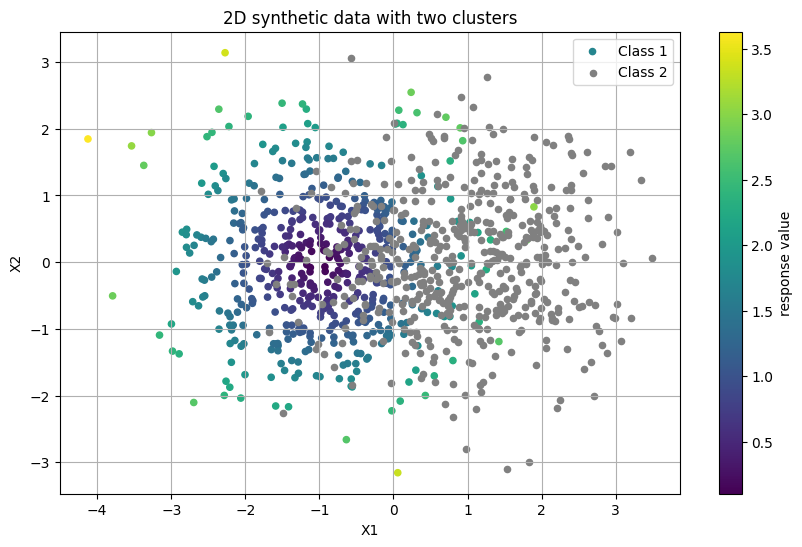

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_records = 500
mean1 = [-1, 0]
mean2 = [1, 0]
variance = 1
point_size = 20  # Adjust the point size here
# Generate data for the first cluster
data1 = np.random.normal(loc=mean1, scale=variance, size=(num_records, 2))
distances1 = np.linalg.norm(data1 - mean1, axis=1)

# Generate data for the second cluster
data2 = np.random.normal(loc=mean2, scale=variance, size=(num_records, 2))

# Plot the first cluster with color varying according to the distance
plt.figure(figsize=(10, 6))
scatter1 = plt.scatter(data1[:, 0], data1[:, 1], c=distances1, cmap='viridis', marker='o', s=point_size,  label='Class 1')
plt.colorbar(scatter1, label='response value')

# Plot the second cluster in gray
plt.scatter(data2[:, 0], data2[:, 1], c='gray', marker='o',  s=point_size, label='Class 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D synthetic data with two clusters')
plt.legend()
plt.savefig('synthetic_data.png')
plt.grid(True)
plt.show()

# Learn then test
firstly try the first stage, and see how it works. 

In [57]:
from scipy.stats import binom
def hb_p_value(r_hat, n, alpha):
    bentkus_p_value = np.e * binom.cdf(np.ceil(n * r_hat), n, alpha)
    
    def h1(y, mu, eps=1e-10):
        y = np.clip(y, eps, 1 - eps)
        mu = np.clip(mu, eps, 1 - eps)
        with np.errstate(divide='ignore', invalid='ignore'):
            return y * np.log(y / mu) + (1 - y) * np.log((1 - y) / (1 - mu))
    
    hoeffding_p_value = np.exp(-n * h1(min(r_hat, alpha), alpha))
    return min(bentkus_p_value, hoeffding_p_value)

In [55]:
from statsmodels.stats.multitest import multipletests
def bonferroni(p_values,delta):
    rejections, _, _, _ = multipletests(p_values,delta,method='holm',is_sorted=False,returnsorted=False)
    R = np.nonzero(rejections)[0]
    return R 

In [178]:
lambda_grid = np.linspace(0, 1, 20)
l1_risk_vals = list()
alpha = 0.1
n=len(validation_data)
for lambda_val in lambda_grid:
    l1_risk_vals.append(verify_l1(validation_data, lambda_val))
print(l1_risk_vals)

[0.0, 0.19035714285714286, 0.32357142857142857, 0.37, 0.39035714285714285, 0.40464285714285714, 0.4139285714285714, 0.4228571428571429, 0.4317857142857143, 0.44107142857142856, 0.44571428571428573, 0.45357142857142857, 0.465, 0.4764285714285714, 0.485, 0.4907142857142857, 0.4953571428571429, 0.4975, 0.4992857142857143, 0.49964285714285717]


In [179]:
def calc_p_values(risk_vals, n, alpha_val):
    p_values = np.zeros_like(risk_vals)
    for i in range(len(risk_vals)): 
        p_values[i] = hb_p_value(risk_vals[i],n,alpha_val)
        # print(risk_vals[i])
    return p_values
p_values=calc_p_values(l1_risk_vals, n, alpha)
print(p_values)
print(l1_risk_vals)
print(lambda_grid[2])

[7.56883582e-129 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000]
[0.0, 0.19035714285714286, 0.32357142857142857, 0.37, 0.39035714285714285, 0.40464285714285714, 0.4139285714285714, 0.4228571428571429, 0.4317857142857143, 0.44107142857142856, 0.44571428571428573, 0.45357142857142857, 0.465, 0.4764285714285714, 0.485, 0.4907142857142857, 0.4953571428571429, 0.4975, 0.4992857142857143, 0.49964285714285717]
0.10526315789473684


In [180]:
delta=0.1
R = bonferroni(p_values, delta)

print(R[len(R)-1])
print(lambda_grid[R[len(R)-1]])

0
0.0


In [181]:
verify_l1(validation_data, 0)

0.0

In [183]:
gamma_grid = np.linspace(0, 1, 20)
l2_risk_vals = list()
beta = 0.1
n=len(validation_data)
for gamma_val in gamma_grid:
    l2_risk_vals.append(verify_l2(validation_data, gamma_val, 0.0))
print(l2_risk_vals)

[0.49964285714285717, 0.3267857142857143, 0.18678571428571428, 0.08714285714285715, 0.03321428571428572, 0.0125, 0.004285714285714286, 0.00035714285714285714, 0.00035714285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [184]:
l2_p_values=calc_p_values(l2_risk_vals, n, beta)
print(l2_p_values)
# print(l1_risk_vals)
# print(lambda_grid[2])

[1.00000000e+000 1.00000000e+000 1.00000000e+000 3.13667651e-002
 1.22217725e-040 3.24164716e-081 3.58766909e-107 6.39968904e-126
 6.39968904e-126 7.56883582e-129 7.56883582e-129 7.56883582e-129
 7.56883582e-129 7.56883582e-129 7.56883582e-129 7.56883582e-129
 7.56883582e-129 7.56883582e-129 7.56883582e-129 7.56883582e-129]


In [187]:
R = bonferroni(l2_p_values, delta)
print(R)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Two stage control
create a grid and calc risk 

In [170]:
num_points_on_grid = 5

# Create the range for lambda and gamma
lambda_range = np.linspace(0, 1, num_points_on_grid)
gamma_range = np.linspace(0, 1, num_points_on_grid)

# Create the 2D grid
lambda_grid, gamma_grid = np.meshgrid(lambda_range, gamma_range)
l1_risk_vals = np.zeros((num_points_on_grid, num_points_on_grid))
l2_risk_vals = np.zeros((num_points_on_grid, num_points_on_grid))
for i in range(num_points_on_grid):
    for j in range(num_points_on_grid):
        lambda_val = lambda_grid[i, j]
        gamma_val = gamma_grid[i, j]
        l1_risk_vals[i, j] = verify_l1(test_data, lambda_val)
        l2_risk_vals[i, j] = verify_l2(test_data, gamma_val, lambda_val)
l1_risk_vals_flatten= l1_risk_vals.flatten()
l2_risk_vals_flatten= l2_risk_vals.flatten()

In [171]:
l1_risk_vals

array([[0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333],
       [0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333],
       [0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333],
       [0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333],
       [0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333]])

In [172]:
l1_risk_vals_flatten

array([0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333,
       0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333,
       0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333,
       0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333,
       0.        , 0.40833333, 0.4375    , 0.48083333, 0.50083333])

In [173]:
lambda_grid

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [174]:
gamma_grid

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

In [167]:

l1_p_values=calc_p_values(l1_risk_vals_flatten, n, alpha)
l2_p_values=calc_p_values(l2_risk_vals_flatten, n, beta)

R1 = bonferroni(l1_p_values, delta)
R2 = bonferroni(l2_p_values, delta)
print(R1)
print(R2)
# print(l1_p_values)
# l2_p_values

[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380]
[ 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380]


In [206]:
num_points_on_grid= 20
lambda_vals = np.linspace(0, 1, num_points_on_grid)
gamma_vals = np.linspace(0, 1, num_points_on_grid)

gamma_indices = list()
lambda_indices = list()
for index in list(set(R1) & set(R2)):
    gamma_index= int(index / num_points_on_grid)
    gamma_indices.append(gamma_index)
    lambda_index = index % num_points_on_grid
    lambda_indices.append(lambda_index)
    # print('{}:{}'.format(lambda_index,gamma_index))
    # print('{}:{}'.format(lambda_vals[lambda_index],gamma_vals[gamma_index]))
max_lambda_index = max(lambda_indices)
min_gamma_index = min(gamma_indices)
# print(lambda_vals[max_lambda_index])
# print(gamma_vals[min_gamma_index])
print(verify_l1(test_data, lambda_vals[max_lambda_index]))
print(verify_l2(test_data, gamma_vals[min_gamma_index], lambda_vals[max_lambda_index]))

0.0
0.0425
